In [4]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import joblib

In [10]:
df = pd.read_csv('C:/Users/macke/Desktop/study_project/my_projects/restaurant_demand_forecasting/data/feature_engineered_data.csv')
df['visit_date'] = pd.to_datetime(df['visit_date'])
df.head()

,air_store_id,visit_date,visitors,day_of_week,year,month,day,week,is_weekend,mean_visitors,median_visitors,min_visitors,max_visitors,std_visitors,store_id_encoded
0,air_ba937bf13d40fb24,2016-01-13,25,2,2016,1,13,2,0,22.782609,22.0,1,61,11.810526,603
1,air_ba937bf13d40fb24,2016-01-14,32,3,2016,1,14,2,0,22.782609,22.0,1,61,11.810526,603
2,air_ba937bf13d40fb24,2016-01-15,29,4,2016,1,15,2,0,22.782609,22.0,1,61,11.810526,603
3,air_ba937bf13d40fb24,2016-01-16,22,5,2016,1,16,2,1,22.782609,22.0,1,61,11.810526,603
4,air_ba937bf13d40fb24,2016-01-18,6,0,2016,1,18,3,0,22.782609,22.0,1,61,11.810526,603


In [12]:
df.dtypes

air_store_id                object
visit_date          datetime64[ns]
visitors                     int64
day_of_week                  int64
year                         int64
month                        int64
day                          int64
week                         int64
is_weekend                   int64
mean_visitors              float64
median_visitors            float64
min_visitors                 int64
max_visitors                 int64
std_visitors               float64
store_id_encoded             int64
dtype: object

In [14]:
# Choose features (X) and label (y)
features = ['year', 'month', 'day', 'day_of_week', 'week','is_weekend', 'mean_visitors', 'median_visitors',
    'min_visitors', 'max_visitors', 'std_visitors','store_id_encoded']

X = df[features]
y = df['visitors']


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [32]:
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [20]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

MAE: 7.32
RMSE: 11.16


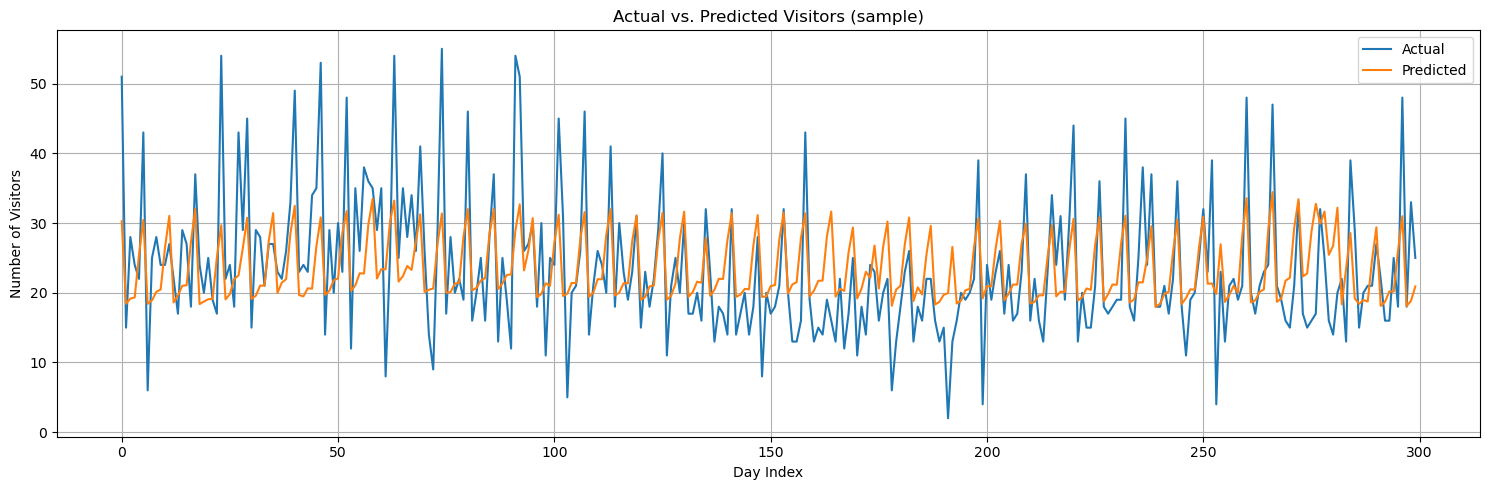

In [22]:
plt.figure(figsize=(15,5))
plt.plot(y_test.values[:300], label='Actual')
plt.plot(y_pred[:300], label='Predicted')
plt.legend()
plt.title("Actual vs. Predicted Visitors (sample)")
plt.xlabel("Day Index")
plt.ylabel("Number of Visitors")
plt.grid(True)
plt.tight_layout()
plt.show()

In [28]:
joblib.dump(model,'C:/Users/macke/Desktop/study_project/my_projects/restaurant_demand_forecasting/models/xgb_visitor_model.pkl')

['C:/Users/macke/Desktop/study_project/my_projects/restaurant_demand_forecasting/models/xgb_visitor_model.pkl']

In [36]:
!where python 


C:\Users\macke\anaconda3\python.exe


In [4]:
import tensorflow as tf
print(tf.__version__)
print(tf.keras.__version__)


2.18.0
3.8.0
